In [61]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from itertools import zip_longest
import os
import glob
import ast

In [2]:
df = pd.read_csv("All measurements V2, cleaned/all_measurements_summery_30,000_cleaned.csv")

In [3]:
df.keys()

Index(['expected_weight', 'run_index', 'force_sensor_value', 'force_vector_1',
       'force_vector_2', 'force_vector_3', 'robot_tcp.velocity_linear_1',
       'robot_tcp.velocity_linear_2', 'robot_tcp.velocity_linear_3',
       'robot_tcp.velocity_angular_1', 'robot_tcp.velocity_angular_2',
       'robot_tcp.velocity_angular_3', 'robot_tcp.joint_angles_1',
       'robot_tcp.joint_angles_2', 'robot_tcp.joint_angles_3',
       'robot_tcp.joint_angles_4', 'robot_tcp.joint_angles_5',
       'robot_tcp.joint_angles_6', 'robot_tcp.flange_1', 'robot_tcp.flange_2',
       'robot_tcp.flange_3', 'robot_tcp.flange_4', 'robot_tcp.flange_5',
       'robot_tcp.flange_6', 'robot_tcp.flange_7'],
      dtype='object')

In [4]:
df

,expected_weight,run_index,force_sensor_value,force_vector_1,force_vector_2,force_vector_3,robot_tcp.velocity_linear_1,robot_tcp.velocity_linear_2,robot_tcp.velocity_linear_3,robot_tcp.velocity_angular_1,...,robot_tcp.joint_angles_4,robot_tcp.joint_angles_5,robot_tcp.joint_angles_6,robot_tcp.flange_1,robot_tcp.flange_2,robot_tcp.flange_3,robot_tcp.flange_4,robot_tcp.flange_5,robot_tcp.flange_6,robot_tcp.flange_7
0,0.335,1,0.340568,0.775,-0.453,20.0,0.079766,-0.010370,0.902352,0.000027,...,-2.721707,4.688728,-0.142706,-0.371705,-0.598554,0.068898,0.322016,0.946589,0.014908,-0.007314
1,0.335,1,0.340568,0.785,-0.431,20.0,0.079766,-0.010370,0.902352,0.000027,...,-2.721707,4.688728,-0.142706,-0.371705,-0.598554,0.068898,0.322016,0.946589,0.014908,-0.007314
2,0.335,1,0.341568,0.800,-0.402,20.0,0.153676,-0.044164,0.886970,-0.016157,...,-2.670519,4.689290,-0.137949,-0.371329,-0.598654,0.070673,0.322003,0.946594,0.014877,-0.007324
3,0.335,1,0.341568,0.810,-0.368,20.0,0.153676,-0.044164,0.886970,-0.016157,...,-2.670519,4.689290,-0.137949,-0.371329,-0.598654,0.070673,0.322003,0.946594,0.014877,-0.007324
4,0.335,1,0.342568,0.815,-0.338,19.0,0.156814,-0.048875,0.886929,-0.022112,...,-2.667505,4.689307,-0.137588,-0.371082,-0.598744,0.072457,0.322000,0.946595,0.014853,-0.007342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15179139,0.482,30973,0.567018,0.190,0.668,16126.0,0.226613,0.411088,0.686115,-0.018644,...,-1.369907,1.565777,4.407333,-0.530585,-0.187143,0.548930,-0.462112,0.886810,0.003469,-0.002924
15179140,0.482,30973,0.568018,0.230,0.691,16322.0,0.226613,0.411088,0.686115,-0.018644,...,-1.369907,1.565777,4.407333,-0.530585,-0.187143,0.548930,-0.462112,0.886810,0.003469,-0.002924
15179141,0.482,30973,0.570018,0.260,0.711,16660.0,0.226613,0.411088,0.686115,-0.018644,...,-1.369907,1.565777,4.407333,-0.530133,-0.186387,0.550307,-0.462154,0.886788,0.003433,-0.002924
15179142,0.482,30973,0.571018,0.284,0.736,16932.0,0.226613,0.411088,0.686115,-0.018644,...,-1.369907,1.565777,4.407333,-0.530133,-0.186387,0.550307,-0.462154,0.886788,0.003433,-0.002924


In [5]:
df = df.groupby('run_index', as_index=False).mean(numeric_only=True)

In [6]:
df

,run_index,expected_weight,force_sensor_value,force_vector_1,force_vector_2,force_vector_3,robot_tcp.velocity_linear_1,robot_tcp.velocity_linear_2,robot_tcp.velocity_linear_3,robot_tcp.velocity_angular_1,...,robot_tcp.joint_angles_4,robot_tcp.joint_angles_5,robot_tcp.joint_angles_6,robot_tcp.flange_1,robot_tcp.flange_2,robot_tcp.flange_3,robot_tcp.flange_4,robot_tcp.flange_5,robot_tcp.flange_6,robot_tcp.flange_7
0,1,0.335,0.347914,-0.286043,-0.248598,17.870183,0.366421,0.054589,0.957501,-0.046914,...,-2.248075,4.698112,-0.017268,-0.260998,-0.599612,0.314689,0.322120,0.946613,1.045429e-02,-0.006334
1,2,0.092,0.089347,0.075095,-0.013662,16.856833,-0.000090,-0.000086,0.000083,-0.000164,...,-1.713421,4.721561,-1.425530,-0.104499,-0.452661,0.539790,-0.396544,0.918015,-1.206858e-03,-0.000150
2,3,0.323,0.286799,-0.368245,0.708643,15.803245,0.446692,0.211149,1.174962,-0.055394,...,-2.062468,4.691264,-3.750887,-0.467204,-0.635581,0.372125,0.992705,-0.119190,-2.084927e-03,-0.017375
3,4,0.116,0.082121,-0.131154,0.727449,14.274390,0.702273,-0.087471,0.948077,-0.175746,...,-2.071166,4.640083,-3.754024,-0.593331,-0.617500,0.266061,0.983525,-0.167895,1.051699e-02,-0.062761
4,5,0.253,0.256462,-0.042422,0.256105,17.440404,0.129020,-0.001020,0.932028,-0.032907,...,-2.395270,4.706968,-4.112516,-0.207788,-0.557605,0.261778,0.986999,0.160469,1.759608e-03,-0.008507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30968,30969,0.097,0.067604,-0.020131,0.001588,15780.957576,-0.000005,-0.000046,-0.000047,0.000029,...,-1.313350,1.573593,2.192432,-0.484185,-0.089204,0.494229,0.999242,-0.038934,4.976625e-06,-0.000006
30969,30970,0.097,0.084540,-0.024080,-0.015210,15685.300216,-0.000046,-0.000029,0.000022,-0.000049,...,-1.415726,1.580052,1.324229,-0.468652,-0.089261,0.541659,0.919770,0.392444,-5.864047e-04,0.003258
30970,30971,0.074,0.082294,-0.027462,-0.025739,15495.560081,-0.000062,-0.000036,0.000053,-0.000059,...,-1.335272,1.573662,-1.306160,-0.474459,-0.086479,0.501104,-0.142037,0.989861,1.052893e-07,-0.000003
30971,30972,0.281,0.289912,-0.375806,0.286435,17179.008065,-0.233482,0.467417,1.013818,-0.000513,...,-0.581498,1.569952,1.277380,-0.464087,-0.472094,0.167262,0.777375,0.629037,1.825381e-04,-0.000817


In [7]:
X = df.drop(columns=["expected_weight", "run_index"])
y = df["expected_weight"]

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.01),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1)
}

In [11]:
results = []
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append((name, mae, r2))

In [13]:
results_df = pd.DataFrame(results, columns=["Model", "MAE", "R2"])
print(results_df.sort_values(by="MAE"))

               Model       MAE        R2
4      Random Forest  0.015687  0.976163
3      Decision Tree  0.022102  0.952327
0  Linear Regression  0.023672  0.952779
1   Ridge Regression  0.023673  0.952781
2   Lasso Regression  0.027069  0.939818


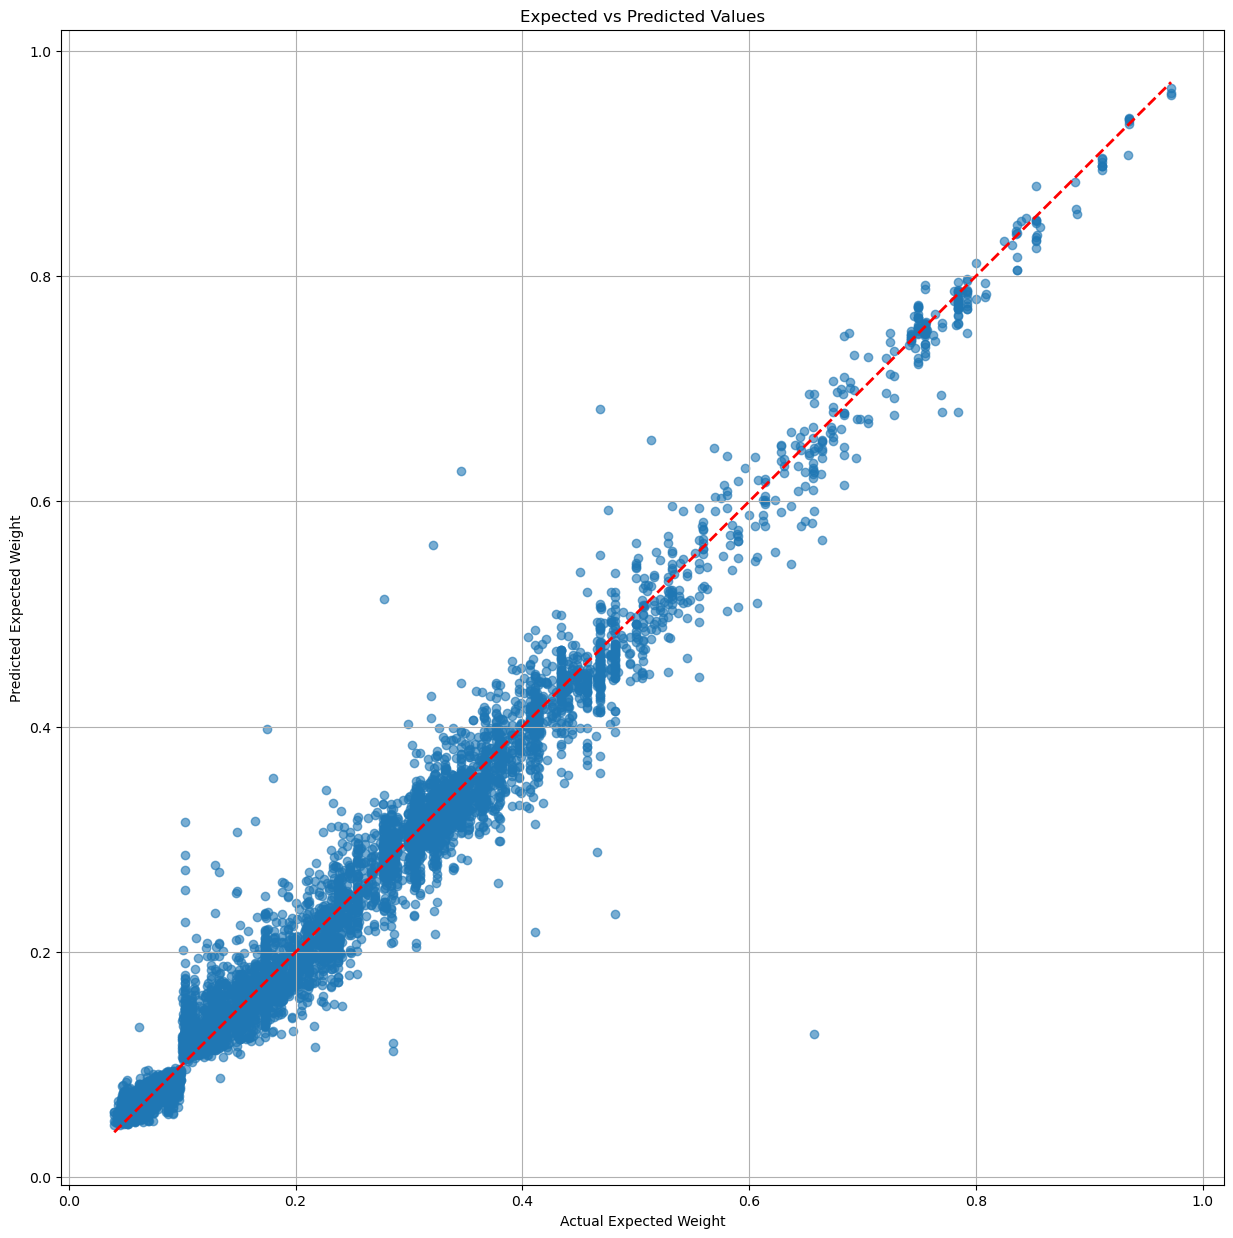

In [15]:
best_model = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1)
best_model.fit(X_train_scaled, y_train)
y_pred = best_model.predict(X_test_scaled)

plt.figure(figsize=(15,15))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel("Actual Expected Weight")
plt.ylabel("Predicted Expected Weight")
plt.title("Expected vs Predicted Values")
plt.grid(True)
plt.show()

In [33]:
df1 = pd.read_csv("Manual_measurements_cleaned_and_structured.csv")
df1 = df1.groupby('run_index', as_index=False).mean(numeric_only=True)

In [34]:
df1

,run_index,expected_weight,force_sensor_value,force_vector_1,force_vector_2,force_vector_3,robot_tcp.joint_angles_1,robot_tcp.joint_angles_2,robot_tcp.joint_angles_3,robot_tcp.joint_angles_4,...,robot_tcp.velocity_linear_1,robot_tcp.velocity_linear_2,robot_tcp.velocity_linear_3,robot_tcp.flange_1,robot_tcp.flange_2,robot_tcp.flange_3,robot_tcp.flange_4,robot_tcp.flange_5,robot_tcp.flange_6,robot_tcp.flange_7
0,1,0.165,0.094198,-0.593200,-1.268204,24946.004032,-1.739457,-1.475510,-1.644531,-1.577680,...,-0.430589,0.840864,0.836345,-0.265845,-0.565537,0.693519,-0.476223,0.879267,-0.009273,0.000816
1,2,0.165,0.376381,1.429713,-0.492840,26905.309091,-1.615214,-1.516223,-1.667944,-1.540061,...,-0.417054,0.743032,0.957317,-0.198898,-0.614098,0.657333,0.973933,-0.226695,-0.006343,-0.004754
2,3,0.165,0.255139,-0.215604,-0.138101,30273.241237,-2.611707,-1.493263,-1.209746,-2.009503,...,0.000019,-0.000237,-0.000031,-0.597408,-0.147488,0.916696,0.973975,-0.226657,0.000021,-0.000018
3,4,0.165,0.101989,-1.622191,-1.107617,28597.716024,-1.909589,-1.814916,-1.435427,-1.514328,...,-0.537542,0.623715,0.856744,-0.411145,-0.706868,0.602932,0.338694,0.934701,0.026744,0.100079
4,5,0.165,0.040382,-0.709976,-1.535785,29466.776423,-1.711066,-1.779061,-1.497332,-1.437439,...,-0.644237,0.588115,0.777660,-0.279949,-0.754118,0.595581,-0.369043,0.929154,-0.009634,0.018710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,118,0.165,0.219717,0.057573,0.602982,25050.103659,-1.804175,-1.405515,-1.763658,-1.510284,...,-0.321924,0.787483,0.929155,-0.291987,-0.504524,0.664769,0.922366,0.385875,-0.003005,0.018150
118,119,0.165,0.113284,-1.695087,-0.050479,29314.309091,-1.822656,-1.688861,-1.571278,-1.439952,...,-0.535519,0.589564,0.753469,-0.352519,-0.669003,0.616563,0.215622,0.976357,-0.006177,0.013018
119,120,0.165,0.023234,-1.426846,0.608960,25304.541414,-1.795390,-1.326965,-1.810904,-1.606919,...,-0.318704,0.569207,0.903085,-0.285243,-0.456647,0.667509,0.315487,0.948593,0.013229,-0.020320
120,121,0.165,0.307361,-1.867806,0.603561,29076.605263,-1.774202,-1.718173,-1.566942,-1.449448,...,-0.473491,0.561321,0.819718,-0.322970,-0.696576,0.595979,0.426268,0.904510,0.011680,0.001774


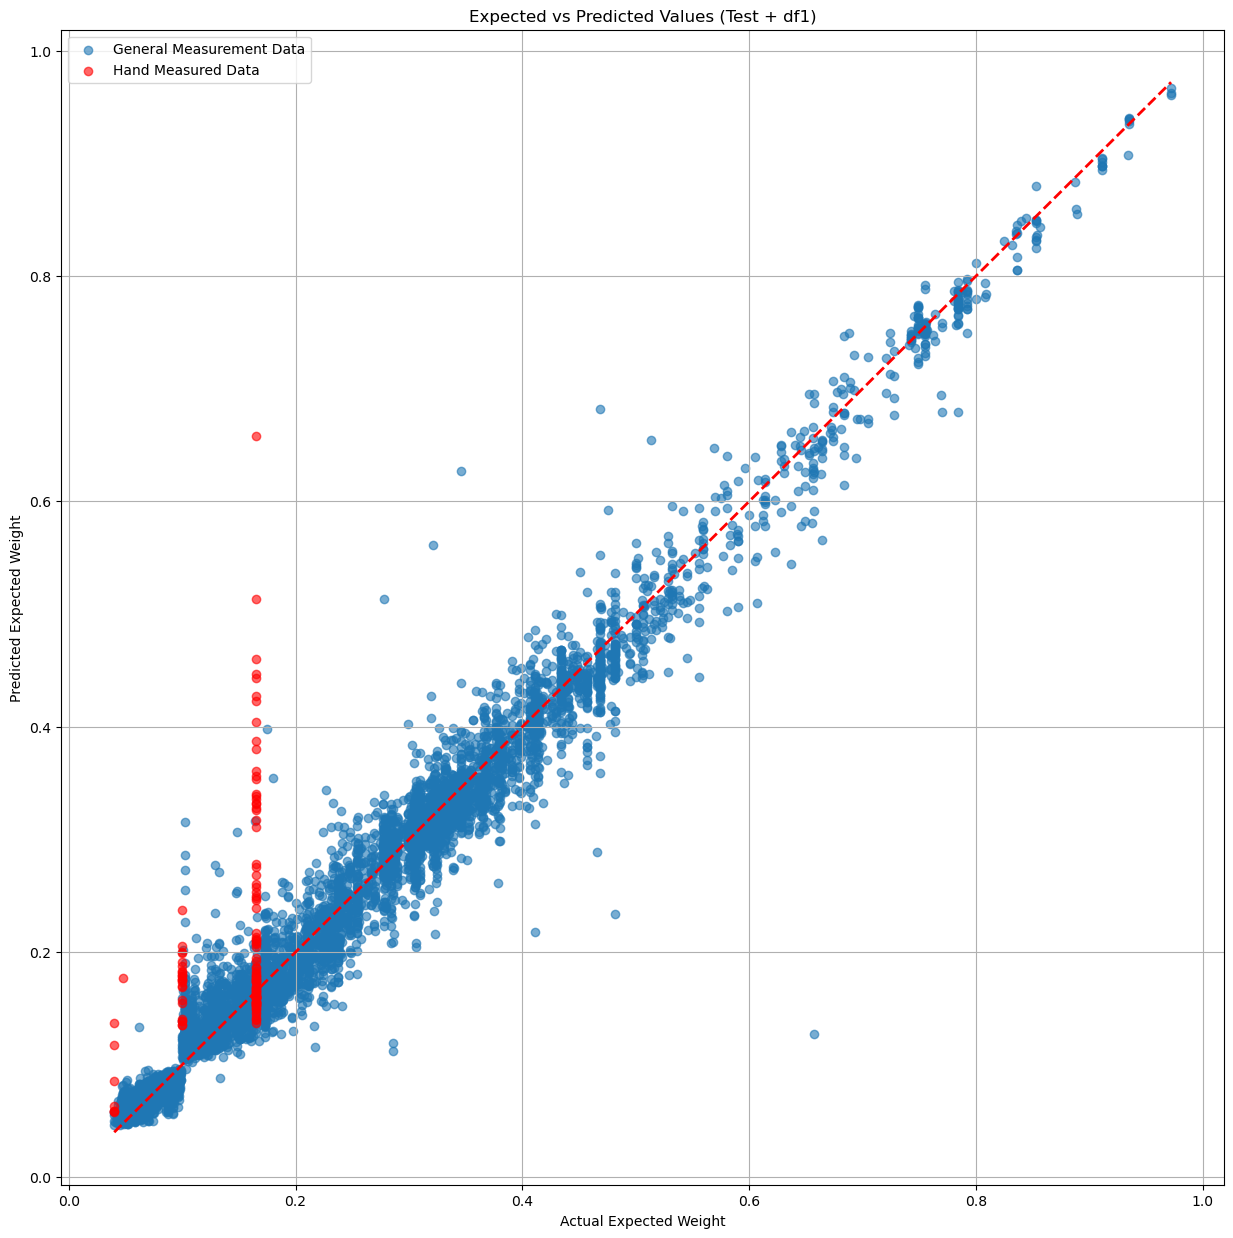

In [43]:
# plot of the data (the full time series as input) with the hand measured values.

X_df1 = df1.drop(columns=["expected_weight", "run_index"]).reindex(columns=X_train.columns)
X_df1_scaled = scaler.transform(X_df1)
y_pred_df1 = best_model.predict(X_df1_scaled)

plt.figure(figsize=(15, 15))
plt.scatter(y_test, y_pred, alpha=0.6, label="General Measurement Data")
plt.scatter(df1["expected_weight"], y_pred_df1, alpha=0.6, color="red", label="Hand Measured Data")

lo = min(y_test.min(), df1["expected_weight"].min())
hi = max(y_test.max(), df1["expected_weight"].max())
plt.plot([lo, hi], [lo, hi], 'r--', linewidth=2)

plt.xlabel("Actual Expected Weight")
plt.ylabel("Predicted Expected Weight")
plt.title("Expected vs Predicted Values (Test + df1)")
plt.legend()
plt.grid(True)
plt.show()